Analisis Exploratorio de Datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración: mostrar todas las columnas en los DataFrames
pd.set_option('display.max_columns', None)


## 1.1 Carga y Exploración Inicial de Datos


In [2]:
# Cargar el dataset
df = pd.read_csv('registros_entrenamiento-2.csv')

print("=" * 60)
print("INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 60)
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas:")
display(df.head())

print("\n" + "=" * 60)
print("TIPOS DE DATOS")
print("=" * 60)
print(df.dtypes)


INFORMACIÓN BÁSICA DEL DATASET

Dimensiones del dataset: 8000 filas x 14 columnas

Primeras 5 filas:


,IdPasajero,PlanetaOrigen,SuenoCriogenico,Cabina,Destino,Edad,ServicioVIP,ServicioHabitacion,Cafeteria,CentroComercial,Spa,CubiertaVR,Transportado,Iniciales
0,004D8BSQ,NaN,False,C/268/S,TRAPPIST-1e,27.0,False,0.0,63.0,8.0,129.0,2960.0,False,YUW
1,009TL1XF,Europa,False,C/258/P,55 Cancri e,18.0,False,0.0,3492.0,0.0,506.0,8.0,True,SFW
2,00A9QC49,Europa,False,A/30/S,TRAPPIST-1e,44.0,True,1409.0,910.0,17.0,1452.0,3782.0,False,POY
3,00BJM5YI,Earth,False,E/24/P,TRAPPIST-1e,48.0,False,0.0,111.0,0.0,1508.0,0.0,False,ZIT
4,00DQRZAR,Mars,False,F/1550/P,TRAPPIST-1e,68.0,True,523.0,0.0,859.0,201.0,782.0,False,TJJ



TIPOS DE DATOS
IdPasajero             object
PlanetaOrigen          object
SuenoCriogenico        object
Cabina                 object
Destino                object
Edad                  float64
ServicioVIP            object
ServicioHabitacion    float64
Cafeteria             float64
CentroComercial       float64
Spa                   float64
CubiertaVR            float64
Transportado             bool
Iniciales              object
dtype: object


ANÁLISIS DE VALORES FALTANTES

Columnas con valores faltantes:



,Columna,Valores Faltantes,Porcentaje (%)
SuenoCriogenico,SuenoCriogenico,197,2.46
CentroComercial,CentroComercial,191,2.39
ServicioVIP,ServicioVIP,188,2.35
Cabina,Cabina,179,2.24
PlanetaOrigen,PlanetaOrigen,177,2.21
CubiertaVR,CubiertaVR,174,2.17
Spa,Spa,173,2.16
Edad,Edad,165,2.06
Destino,Destino,163,2.04
ServicioHabitacion,ServicioHabitacion,161,2.01


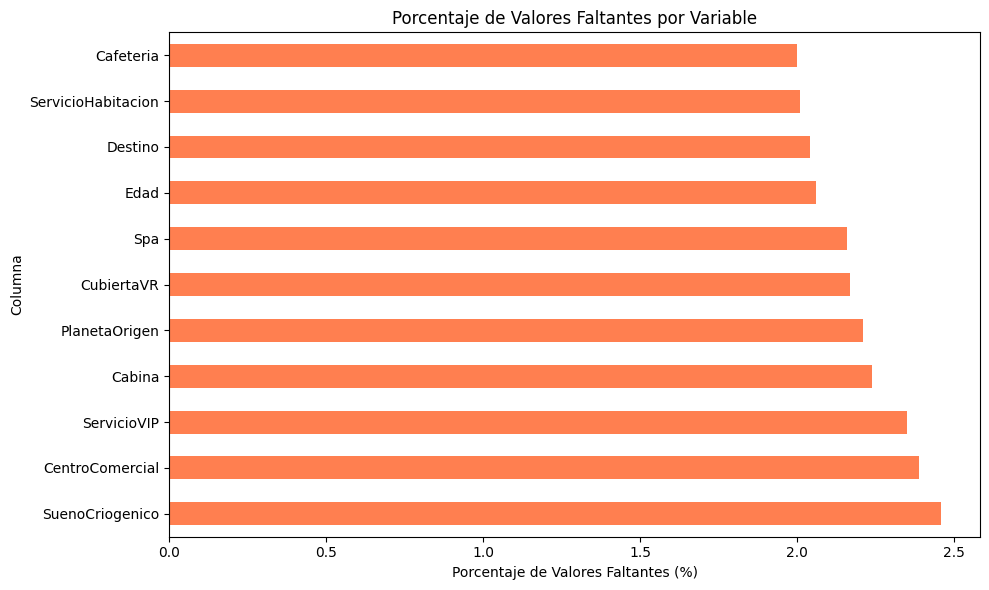

In [ ]:
# Análisis de valores faltantes
print("=" * 60)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)

if len(missing_data) > 0:
    print(f"\nColumnas con valores faltantes:\n")
    display(missing_data)
    
    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    missing_data.set_index('Columna')['Porcentaje (%)'].plot(kind='barh', color='coral')
    plt.xlabel('Porcentaje de Valores Faltantes (%)')
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay valores faltantes en el dataset")


In [4]:
# Estadísticas descriptivas
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
display(df.describe())

print("\n" + "=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 60)
display(df.describe(include=['object', 'bool']))


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Edad,ServicioHabitacion,Cafeteria,CentroComercial,Spa,CubiertaVR
count,7835.000000,7839.000000,7840.000000,7809.000000,7827.000000,7826.000000
mean,28.898532,223.319301,461.104592,171.726085,320.425067,308.133785
std,14.539789,664.351288,1620.003645,597.058475,1159.805503,1152.419633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,82.000000,26.000000,66.000000,48.750000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,IdPasajero,PlanetaOrigen,SuenoCriogenico,Cabina,Destino,ServicioVIP,Transportado,Iniciales
count,8000,7823,7803,7821,7837,7812,8000,8000
unique,8000,3,2,6124,3,2,2,6436
top,ZXEAJ2I3,Earth,False,G/109/P,TRAPPIST-1e,False,True,IET
freq,1,4246,5020,7,5441,7633,4013,5


## 1.2 Análisis de la Variable Objetivo: Transportado


In [ ]:
# Análisis de la variable objetivo
print("=" * 60)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: TRANSPORTADO")
print("=" * 60)

target_counts = df['Transportado'].value_counts()
target_pct = df['Transportado'].value_counts(normalize=True) * 100

print(f"\nConteo:")
print(target_counts)
print(f"\nPorcentaje:")
print(target_pct.round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
target_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribución de Transportado (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Transportado')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['False', 'True'], rotation=0)

# Añadir valores en las barras
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
colors = ['#3498db', '#e74c3c']
axes[1].pie(target_counts, labels=['No Transportado', 'Transportado'], autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción de Pasajeros Transportados', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Balance de clases
balance = target_counts.min() / target_counts.max()
print(f"\n{'⚠️' if balance < 0.8 else '✓'} Balance de clases: {balance:.2f} (1.0 = perfectamente balanceado)")


## 1.3 Distribución de Variables Numéricas


In [ ]:
# Identificar variables numéricas (excluyendo el ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'IdPasajero' in df.columns:
    numeric_cols = [col for col in numeric_cols if col != 'IdPasajero']

print(f"Variables numéricas a analizar: {numeric_cols}\n")

# Histogramas de variables numéricas
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(axis='y', alpha=0.3)

# Ocultar ejes vacíos
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 1.4 Distribución de Variables Categóricas


In [ ]:
# Identificar variables categóricas importantes (excluyendo ID, Iniciales, Cabina que es muy específica)
categorical_cols = ['PlanetaOrigen', 'SuenoCriogenico', 'Destino', 'ServicioVIP']
categorical_cols = [col for col in categorical_cols if col in df.columns]

print(f"Variables categóricas a analizar: {categorical_cols}\n")

# Gráficos de barras para variables categóricas
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() if len(categorical_cols) > 1 else [axes]

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='lightcoral', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Añadir valores en las barras
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v + max(value_counts.values) * 0.01, str(v), ha='center', fontsize=9)

# Ocultar ejes vacíos
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 1.5 Correlación entre Variables Numéricas


In [ ]:
# Matriz de correlación
# Convertir variable objetivo a numérica para la correlación
df_corr = df.copy()
df_corr['Transportado_num'] = df_corr['Transportado'].map({True: 1, False: 0})

# Seleccionar solo variables numéricas para correlación
numeric_cols_corr = df_corr.select_dtypes(include=[np.number]).columns.tolist()
# Excluir ID si existe
numeric_cols_corr = [col for col in numeric_cols_corr if 'Id' not in col]

correlation_matrix = df_corr[numeric_cols_corr].corr()

# Mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Variables Numéricas y Target', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("=" * 60)
print("CORRELACIÓN CON LA VARIABLE OBJETIVO (TRANSPORTADO)")
print("=" * 60)
target_corr = correlation_matrix['Transportado_num'].drop('Transportado_num').sort_values(ascending=False)
print("\nVariables ordenadas por correlación con Transportado:")
print(target_corr)


## 1.6 Relación entre Variables y el Target


In [ ]:
# Relación entre variables categóricas y el target
categorical_for_analysis = ['PlanetaOrigen', 'SuenoCriogenico', 'Destino', 'ServicioVIP']
categorical_for_analysis = [col for col in categorical_for_analysis if col in df.columns]

n_cols = 2
n_rows = (len(categorical_for_analysis) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten() if len(categorical_for_analysis) > 1 else [axes]

for idx, col in enumerate(categorical_for_analysis):
    if idx < len(axes):
        # Crear tabla cruzada normalizada
        ct = pd.crosstab(df[col], df['Transportado'], normalize='index') * 100
        ct.plot(kind='bar', ax=axes[idx], color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'Tasa de Transportado por {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Porcentaje (%)')
        axes[idx].legend(['No Transportado', 'Transportado'], loc='best')
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

# Ocultar ejes vacíos
for idx in range(len(categorical_for_analysis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Boxplots de variables numéricas vs Transportado (para las más importantes)
# Seleccionar variables numéricas relevantes (excluir ID)
numeric_for_boxplot = [col for col in numeric_cols[:6] if col in df.columns]  # Tomar las primeras 6

n_cols = 3
n_rows = (len(numeric_for_boxplot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() if len(numeric_for_boxplot) > 1 else [axes]

for idx, col in enumerate(numeric_for_boxplot):
    if idx < len(axes):
        df_plot = df[[col, 'Transportado']].dropna()
        df_plot.boxplot(column=col, by='Transportado', ax=axes[idx])
        axes[idx].set_title(f'{col} vs Transportado', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Transportado')
        axes[idx].set_ylabel(col)
        plt.sca(axes[idx])
        plt.xticks([1, 2], ['False', 'True'])

# Ocultar ejes vacíos
for idx in range(len(numeric_for_boxplot), len(axes)):
    axes[idx].axis('off')

plt.suptitle('')  # Remover el título automático de pandas
plt.tight_layout()
plt.show()


## 1.7 Hallazgos Clave del Análisis Exploratorio


In [ ]:
# Resumen de hallazgos
print("=" * 80)
print(" " * 20 + "RESUMEN DE HALLAZGOS DEL EDA")
print("=" * 80)

print("\n📊 1. INFORMACIÓN GENERAL:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Total de variables: {len(df.columns)}")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Variables categóricas: {len(df.select_dtypes(include=['object', 'bool']).columns)}")

print("\n⚠️  2. CALIDAD DE DATOS:")
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
if len(missing_summary) > 0:
    print(f"   • Columnas con valores faltantes: {len(missing_summary)}")
    for col, count in missing_summary.items():
        pct = (count / len(df)) * 100
        print(f"     - {col}: {count} ({pct:.1f}%)")
else:
    print("   • ✓ No hay valores faltantes")

print("\n🎯 3. VARIABLE OBJETIVO (Transportado):")
target_dist = df['Transportado'].value_counts(normalize=True) * 100
print(f"   • False (No transportado): {target_dist[False]:.1f}%")
print(f"   • True (Transportado): {target_dist[True]:.1f}%")
balance = min(target_dist) / max(target_dist)
if balance >= 0.8:
    print(f"   • ✓ Dataset balanceado (ratio: {balance:.2f})")
elif balance >= 0.6:
    print(f"   • ⚠️  Ligero desbalance (ratio: {balance:.2f})")
else:
    print(f"   • ⚠️  Dataset desbalanceado (ratio: {balance:.2f}) - considerar técnicas de balanceo")

print("\n🔍 4. VARIABLES MÁS PROMETEDORAS:")
# Basado en correlaciones
if 'Transportado_num' in df_corr.columns:
    top_corr = correlation_matrix['Transportado_num'].drop('Transportado_num').abs().sort_values(ascending=False).head(5)
    print("   Basado en correlación con el target:")
    for var, corr_val in top_corr.items():
        print(f"     - {var}: {corr_val:.3f}")

print("\n💡 5. CORRELACIONES INTERESANTES:")
# Encontrar correlaciones altas entre variables (no con el target)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'Transportado_num' and correlation_matrix.columns[j] != 'Transportado_num':
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:  # Correlación significativa
                corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

if corr_pairs:
    print("   Correlaciones fuertes entre variables (|r| > 0.5):")
    for var1, var2, corr_val in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]:
        print(f"     - {var1} ↔ {var2}: {corr_val:.3f}")
else:
    print("   • No se encontraron correlaciones muy fuertes entre variables predictoras")

print("\n📝 6. OBSERVACIONES ADICIONALES:")
# Análisis de SuenoCriogenico si existe
if 'SuenoCriogenico' in df.columns:
    cryo_transport = df.groupby('SuenoCriogenico')['Transportado'].value_counts(normalize=True).unstack() * 100
    if True in cryo_transport.index and True in cryo_transport.columns:
        cryo_effect = cryo_transport.loc[True, True] - cryo_transport.loc[False, True]
        print(f"   • Sueño criogénico parece tener un efecto de {cryo_effect:+.1f}% en la tasa de transporte")

# Análisis de edad si existe
if 'Edad' in df.columns:
    df_edad_clean = df[df['Edad'].notna()]
    edad_transport = df_edad_clean.groupby('Transportado')['Edad'].mean()
    if len(edad_transport) == 2:
        edad_diff = edad_transport[True] - edad_transport[False]
        print(f"   • Edad promedio de transportados: {edad_transport[True]:.1f} años")
        print(f"   • Edad promedio de no transportados: {edad_transport[False]:.1f} años")

print("\n" + "=" * 80)
print("✓ Análisis exploratorio completado. Listo para el siguiente paso: Preprocesamiento")
print("=" * 80)
